In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
Data = pd.read_csv(r"C:\Users\swapn\Downloads\Netflix Userbase.csv")

In [3]:
Data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [4]:
Data.shape

(2500, 10)

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


# Data Processing

In [6]:
# Check missing values
Data.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

There is no missing values in the dataset.

In [7]:
Data.dtypes

User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

# Cheking for duplicates.

In [8]:
Duplicates = Data[Data.duplicated()]

if Duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)

No duplicates found.


In [11]:
Data.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

In [25]:
Data.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


As we can see the datatypes of  Join Date and the Last payment Date are object we need to do some feature engineering.

In [24]:
# Converting datatypes 
Data['Join Date'] = pd.to_datetime(Data['Join Date'])
Data['Join Year'] = Data['Join Date'].dt.year
Data['Join Month'] = Data['Join Date'].dt.month

Data['Last Payment Date'] = pd.to_datetime(Data['Last Payment Date'])
Data['Last Payment Year'] = Data['Last Payment Date'].dt.year
Data['Last Payment Month'] = Data['Last Payment Date'].dt.month

Data['Subscription_duration'] = Data['Last Payment Date'] - Data['Join Date']

In [16]:
Data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Join Year,Join Month,Last Payment Year,Last Payment Month,Subscription_duration
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,2022,1,2023,10,629 days
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,2021,5,2023,6,774 days
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,2023,2,2023,6,119 days
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,2022,10,2023,6,262 days
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,2023,1,2023,6,174 days


In [17]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   User ID                2500 non-null   int64          
 1   Subscription Type      2500 non-null   object         
 2   Monthly Revenue        2500 non-null   int64          
 3   Join Date              2500 non-null   datetime64[ns] 
 4   Last Payment Date      2500 non-null   datetime64[ns] 
 5   Country                2500 non-null   object         
 6   Age                    2500 non-null   int64          
 7   Gender                 2500 non-null   object         
 8   Device                 2500 non-null   object         
 9   Plan Duration          2500 non-null   object         
 10  Join Year              2500 non-null   int64          
 11  Join Month             2500 non-null   int64          
 12  Last Payment Year      2500 non-null   int64    

# Data Visualization

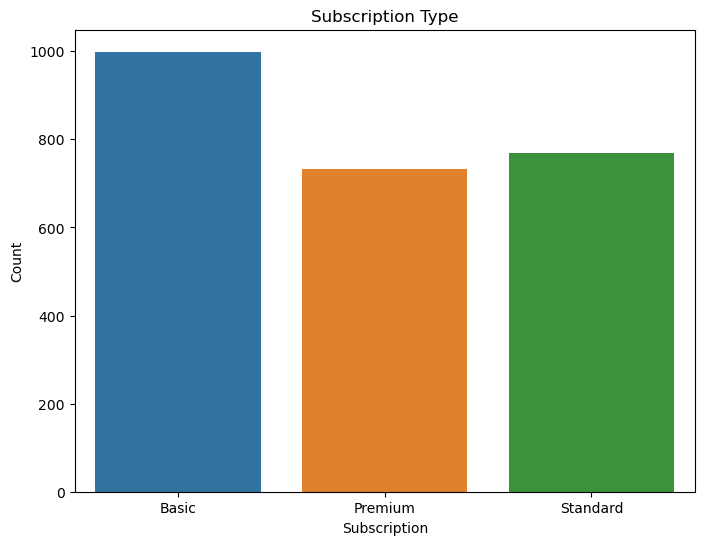

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(data = Data, x ='Subscription Type')
plt.title('Subscription Type')
plt.xlabel('Subscription')
plt.ylabel('Count')
plt.show()

As we can see  here the user mostly takes the Basic subscription.


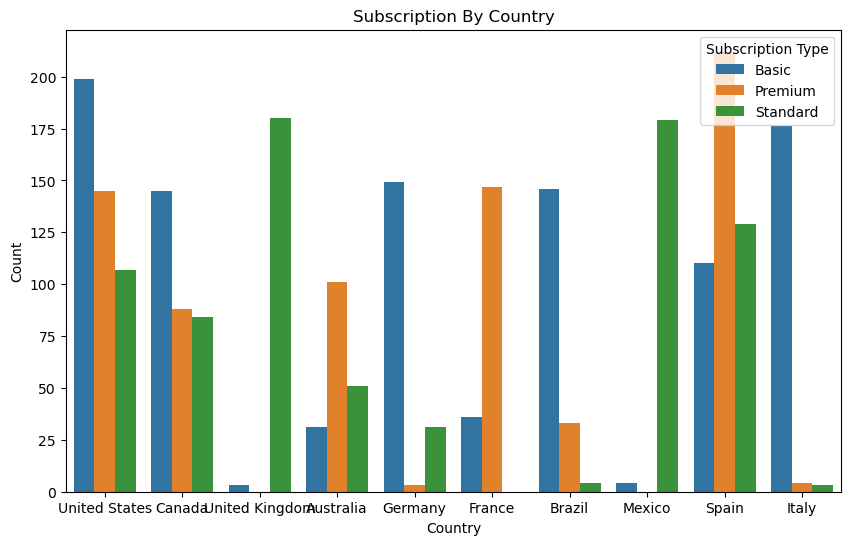

In [9]:
plt.figure(figsize = (10, 6))
sns.countplot(data = Data, x =  'Country', hue = 'Subscription Type')
plt.title('Subscription By Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title = 'Subscription Type')
plt.show()

we can see here Spain and  United stare has more customers.

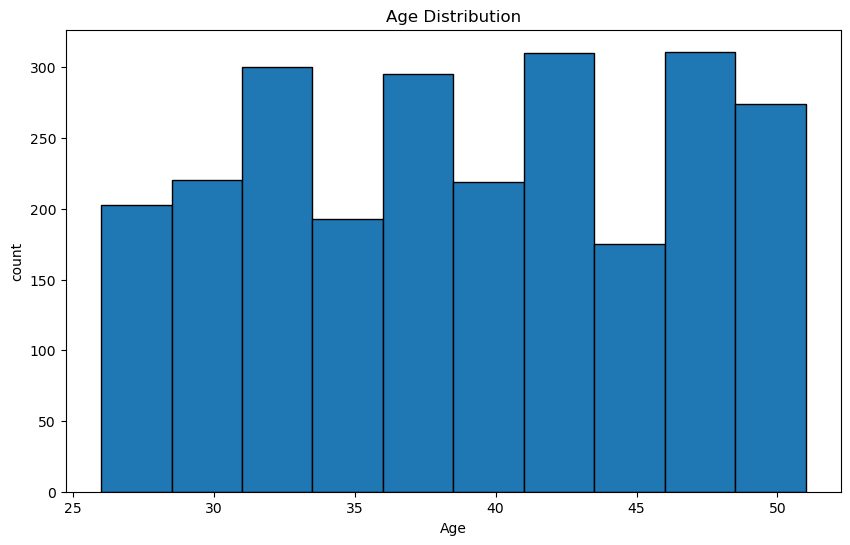

In [20]:
plt.figure(figsize = (10, 6))
plt.hist(Data['Age'], bins = 10 , edgecolor = 'k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

### From the Histogram we conclude that the most users aged between  30-49.

In [4]:
# Segmenting the users into two age groups
Data['Age Group'] = Data['Age'].apply(lambda x: 'Young' if x < 30 else 'Old')

# Calculating the proportion of users in each age group with a 'Premium' subscription
premium_proportions = Data.groupby('Age Group')['Subscription Type'].apply(lambda x: (x == 'Premium').mean())

premium_proportions

Age Group
Old      0.289558
Young    0.319218
Name: Subscription Type, dtype: float64

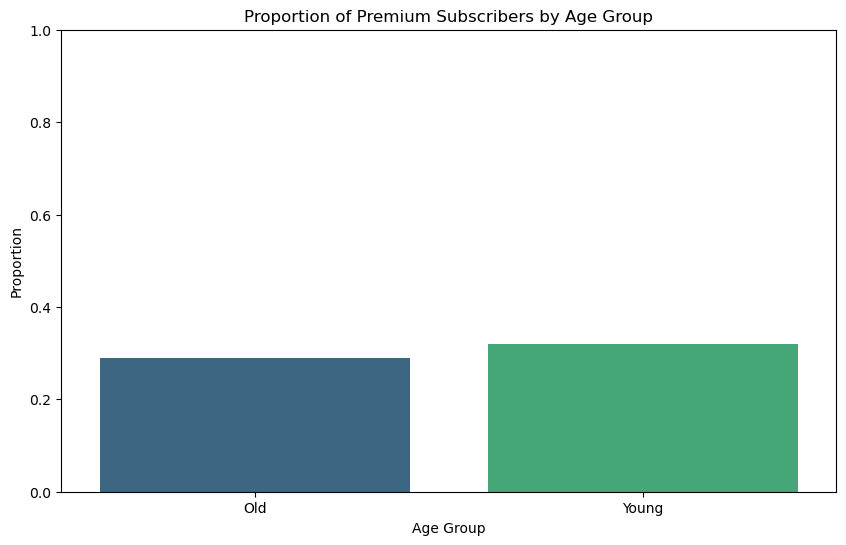

In [5]:
# Creating a bar chart for the proportion of 'Premium' subscribers in each age group
plt.figure(figsize=(10, 6))
sns.barplot(x=premium_proportions.index, y=premium_proportions.values, palette='viridis')
plt.title('Proportion of Premium Subscribers by Age Group')
plt.ylabel('Proportion')
plt.xlabel('Age Group')
plt.ylim(0, 1)
plt.show()

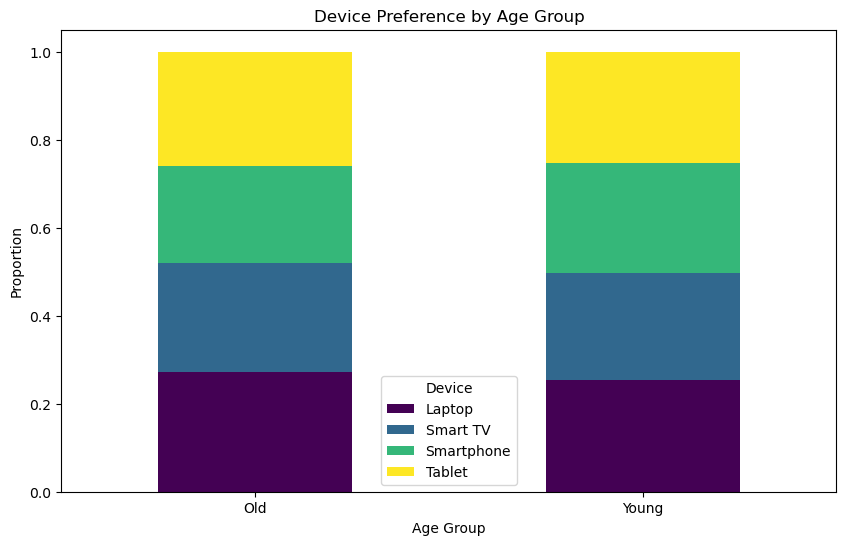

In [16]:
Data['Age Group'] = Data['Age'].apply(lambda x: 'Young' if x < 50 else 'Old')
# Calculating the distribution of devices used by each age group
device_distribution = Data.groupby('Age Group')['Device'].value_counts(normalize=True).unstack()

# Plotting the device distribution for each age group
device_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Device Preference by Age Group')
plt.ylabel('Proportion')
plt.xlabel('Age Group')
plt.legend(title='Device')
plt.xticks(rotation=0)
plt.show()

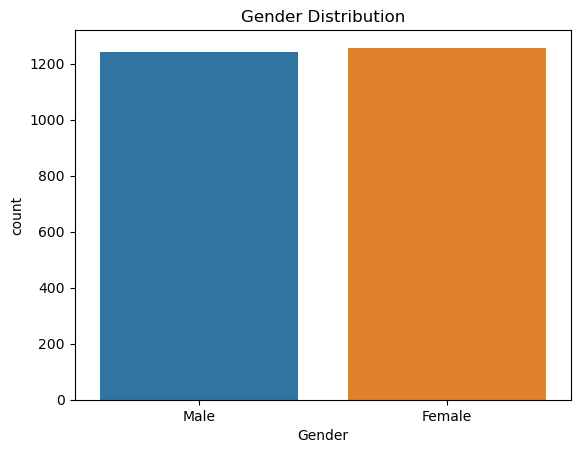

In [21]:
sns.countplot(x = 'Gender', data = Data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

As we conclude both male and female user mostly equal.

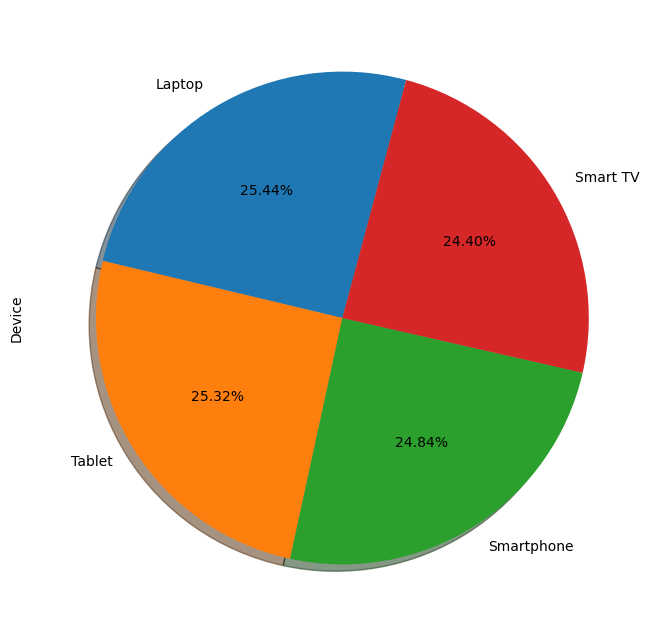

In [22]:
Data.Device.value_counts().plot(kind='pie',shadow='True' ,autopct='%1.2f%%', startangle = 75,figsize=(8,8))
plt.show()

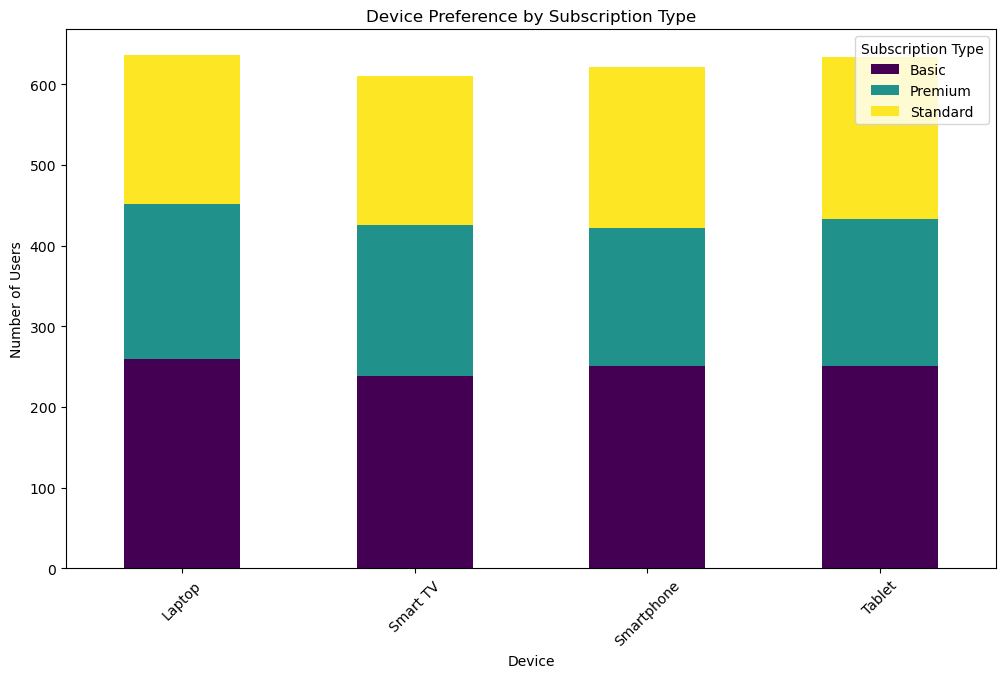

In [3]:
# Most popular devices for each subscription type
device_subscription_counts = Data.groupby(['Device', 'Subscription Type']).size().unstack()

plt.figure(figsize=(12, 7))
device_subscription_counts.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Device Preference by Subscription Type')
plt.xlabel('Device')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(title='Subscription Type')
plt.show()

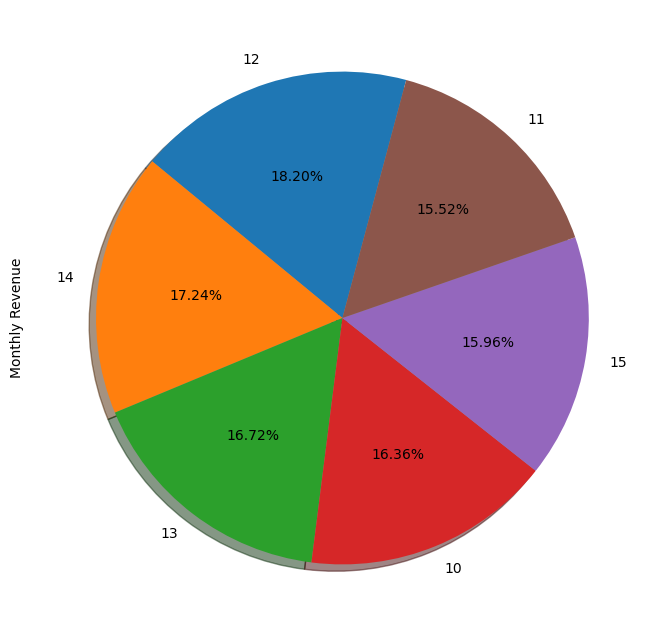

In [4]:
Data['Monthly Revenue'].value_counts().plot(kind='pie',shadow='True' ,autopct='%1.2f%%', startangle = 75,figsize=(8,8))
plt.show()

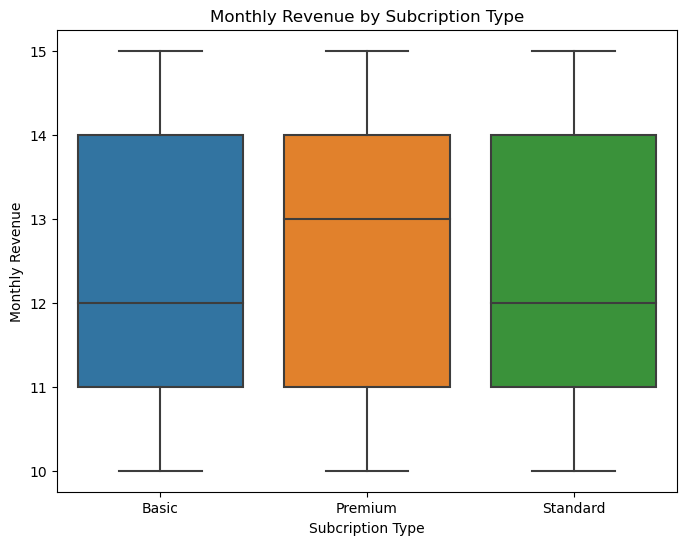

In [5]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = Data,  x = 'Subscription Type', y ='Monthly Revenue')
plt.title('Monthly Revenue by Subcription Type')
plt.xlabel('Subcription Type')
plt.ylabel('Monthly Revenue')
plt.show()

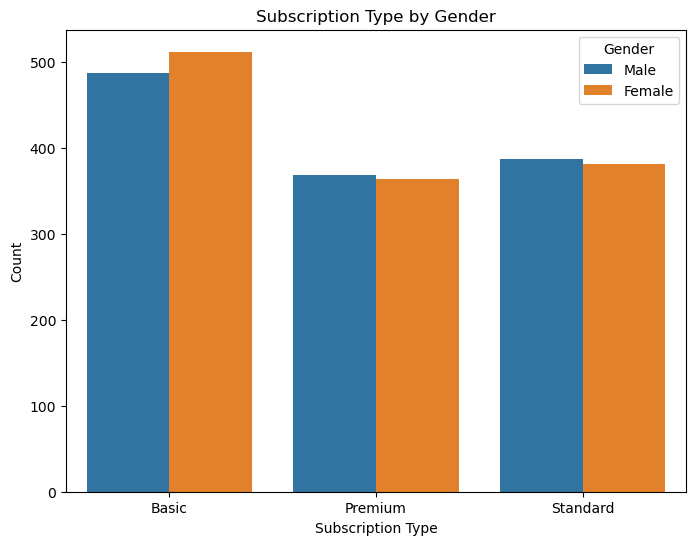

In [97]:
plt.figure(figsize=(8, 6))
sns.countplot(data=Data, x='Subscription Type', hue='Gender')
plt.title('Subscription Type by Gender')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

As we know most of the user took the Basic subcription and from the above plot  we conclude that the count of both the male and female  users are almost same.The difference is too less.

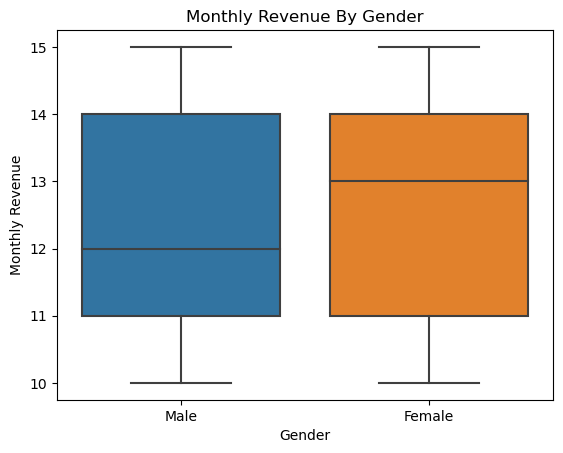

In [108]:
sns.boxplot(data = Data, x = 'Gender', y = 'Monthly Revenue')
plt.title('Monthly Revenue By Gender')
plt.xlabel('Gender')
plt.ylabel('Monthly Revenue')
plt.show()

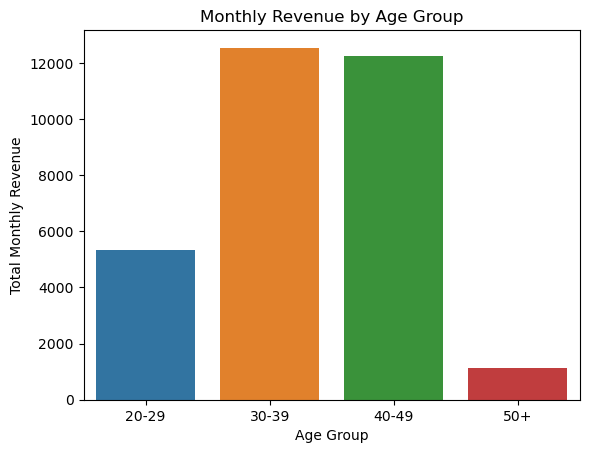

In [15]:
age_bins = [20, 30, 40, 50, 60]
age_labels = ['20-29', '30-39', '40-49', '50+']

Data['age group'] = pd.cut(Data['Age'], bins=age_bins, labels=age_labels)
revenue_by_age = Data.groupby('age group')['Monthly Revenue'].sum().reset_index()
sns.barplot(data=revenue_by_age, x='age group',y='Monthly Revenue')
plt.title('Monthly Revenue by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Monthly Revenue')
plt.show()


From the above graph we conclude that  most of the user purchased subscription are aged 30-49.

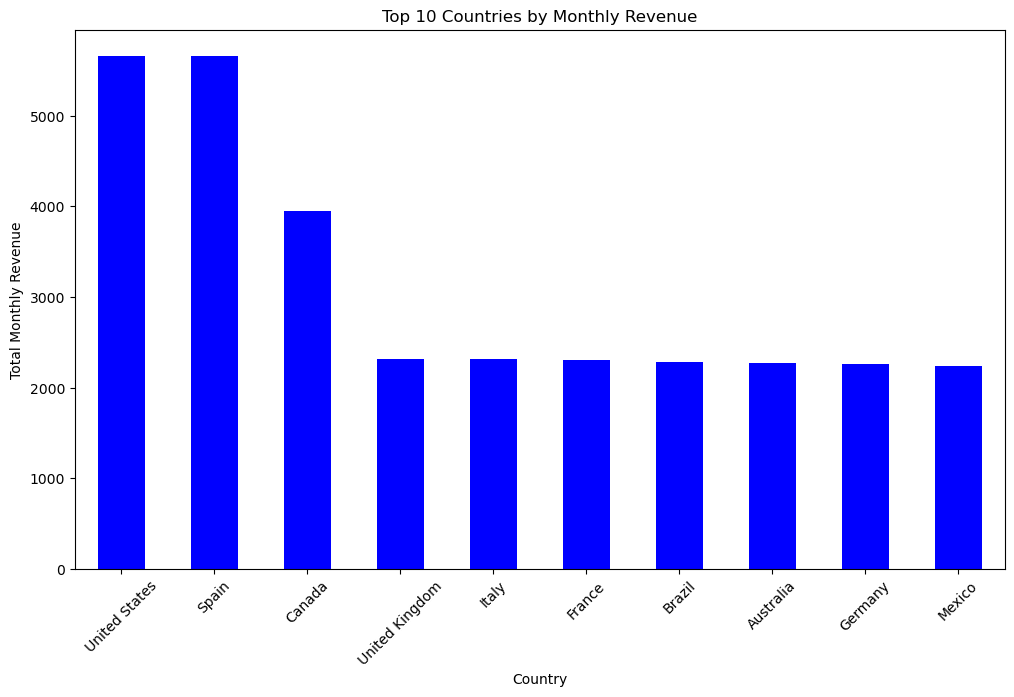

In [12]:
# Total revenue by country
revenue_by_country = Data.groupby('Country')['Monthly Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
revenue_by_country.plot(kind='bar', color='blue')
plt.title('Top 10 Countries by Monthly Revenue')
plt.xlabel('Country')
plt.ylabel('Total Monthly Revenue')
plt.xticks(rotation=45)
plt.show()

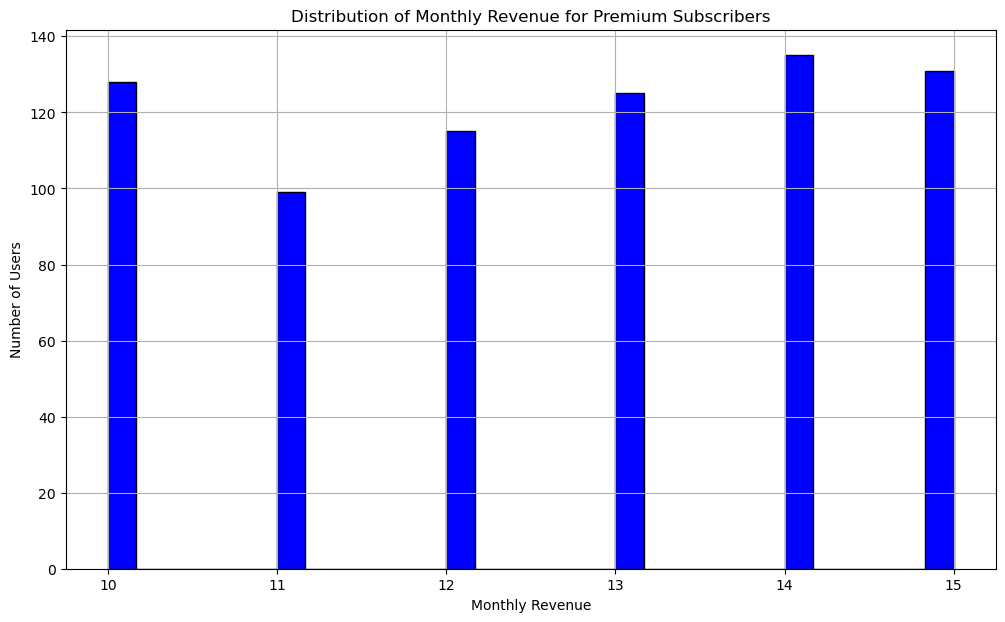

In [8]:
# Distribution of Monthly Revenue for 'Premium' subscribers
premium_revenue_distribution = Data[Data['Subscription Type'] == 'Premium']['Monthly Revenue']

plt.figure(figsize=(12, 7))
premium_revenue_distribution.hist(bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Monthly Revenue for Premium Subscribers')
plt.xlabel('Monthly Revenue')
plt.ylabel('Number of Users')
plt.show()

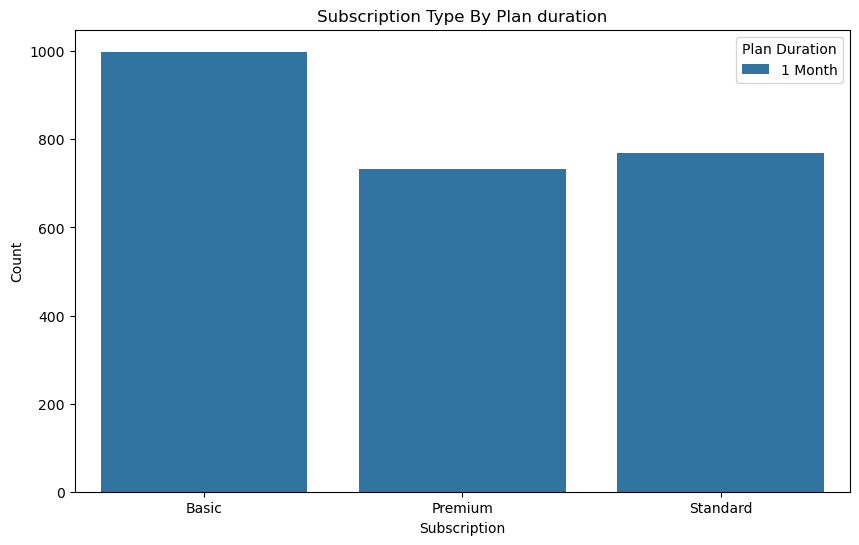

In [46]:
plt.figure(figsize = (10, 6))
sns.countplot(data = Data, x = 'Subscription Type', hue = 'Plan Duration')
plt.title('Subscription Type By Plan duration')
plt.xlabel('Subscription')
plt.ylabel('Count')
plt.show()


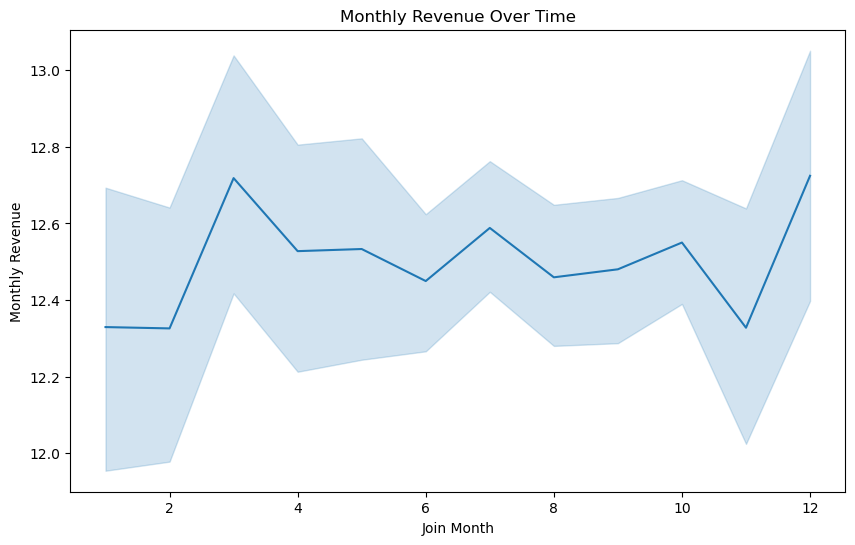

In [47]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=Data, x='Join Month', y='Monthly Revenue', estimator='mean')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Join Month')
plt.ylabel('Monthly Revenue')
plt.show()


In [25]:
# User Tenure
Data['Tenure'] = (Data['Last Payment Date'] - Data['Join Date']).dt.days
                  

In [26]:
Data['Tenure (Months)'] = Data['Tenure'] / 30

In [51]:
Data.head(2)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Join Year,Join Month,Last Payment Year,Last Payment Month,Subscription_duration,Tenure,Tenure (Months),age group
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,2022,1,2023,10,629 days,629,20.966667,20-29
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,2021,5,2023,6,774 days,774,25.800000,30-39


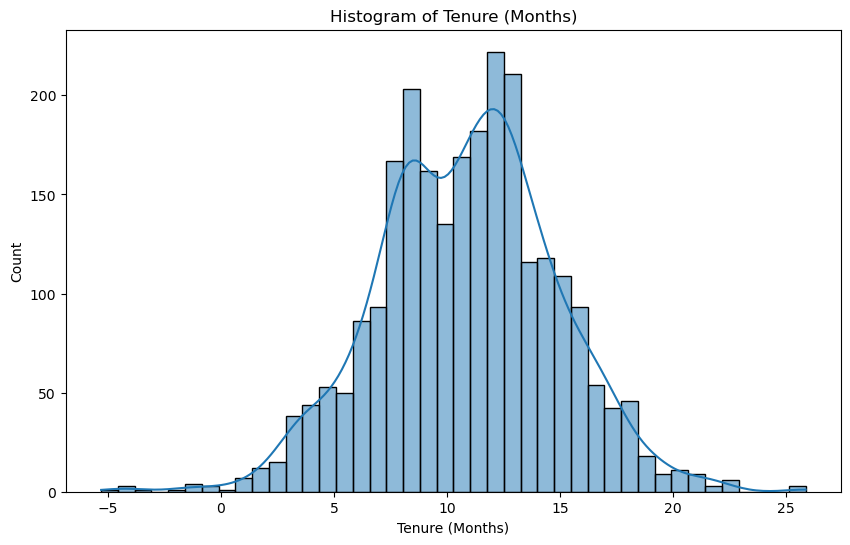

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(data = Data,x='Tenure (Months)', kde=True)
plt.title('Histogram of Tenure (Months)')
plt.show()

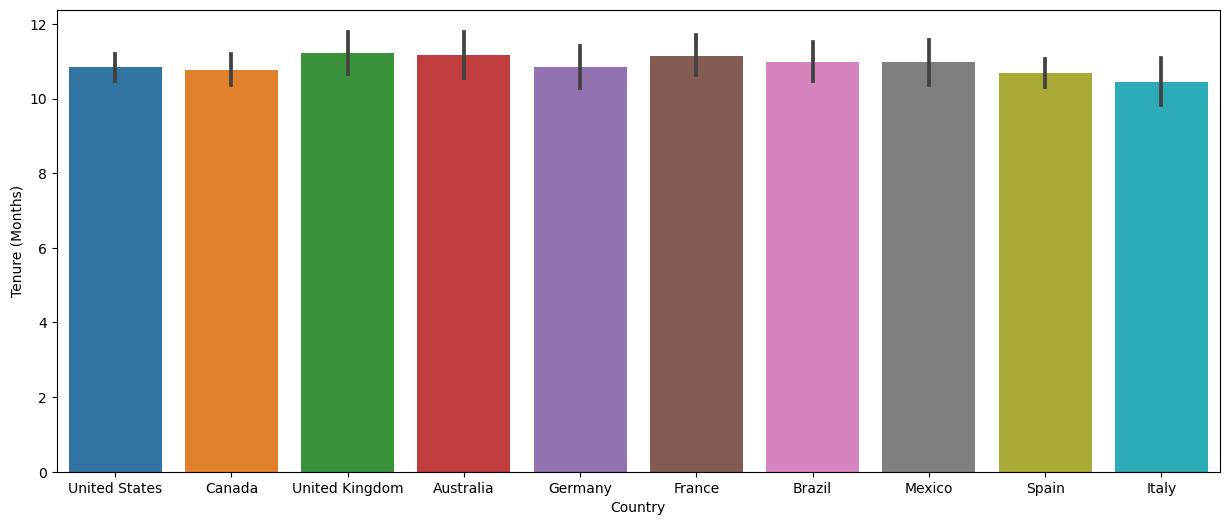

In [39]:
plt.figure(figsize=(15,6))
sns.barplot(data = Data,x ='Country',y ='Tenure (Months)')
plt.show()

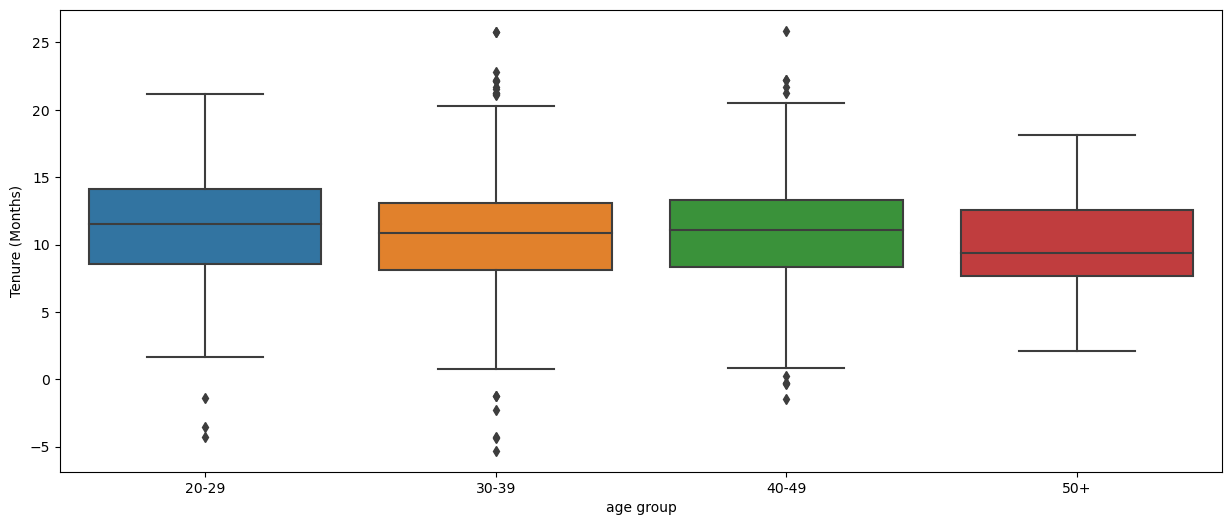

In [55]:
plt.figure(figsize = (15, 6))
sns.boxplot(data = Data, x = 'age group',y ='Tenure (Months)')
plt.show()

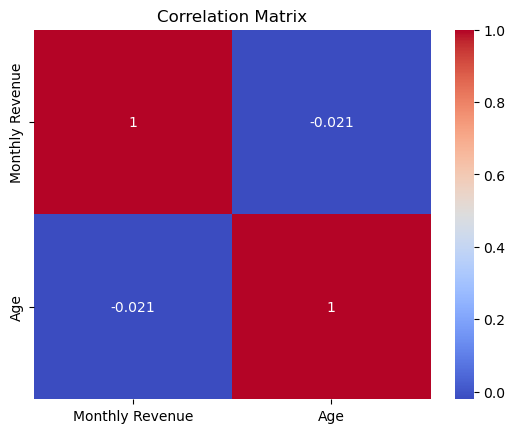

In [56]:
corr_matrix = Data[['Monthly Revenue', 'Age']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

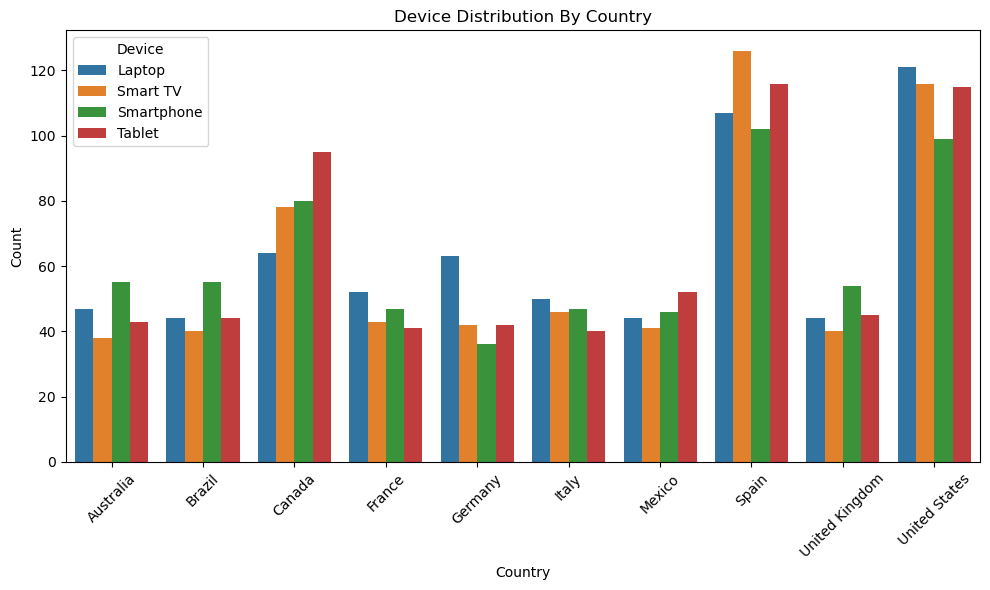

In [27]:
Country_device = Data.groupby(['Country', 'Device']).size().reset_index(name = 'count')
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Country', y = 'count', hue = 'Device', data = Country_device)
plt.title('Device Distribution By Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Country
United States     5664
Spain             5662
Canada            3950
United Kingdom    2318
Italy             2317
France            2307
Brazil            2285
Australia         2271
Germany           2260
Mexico            2237
Name: Monthly Revenue, dtype: int64


<BarContainer object of 10 artists>

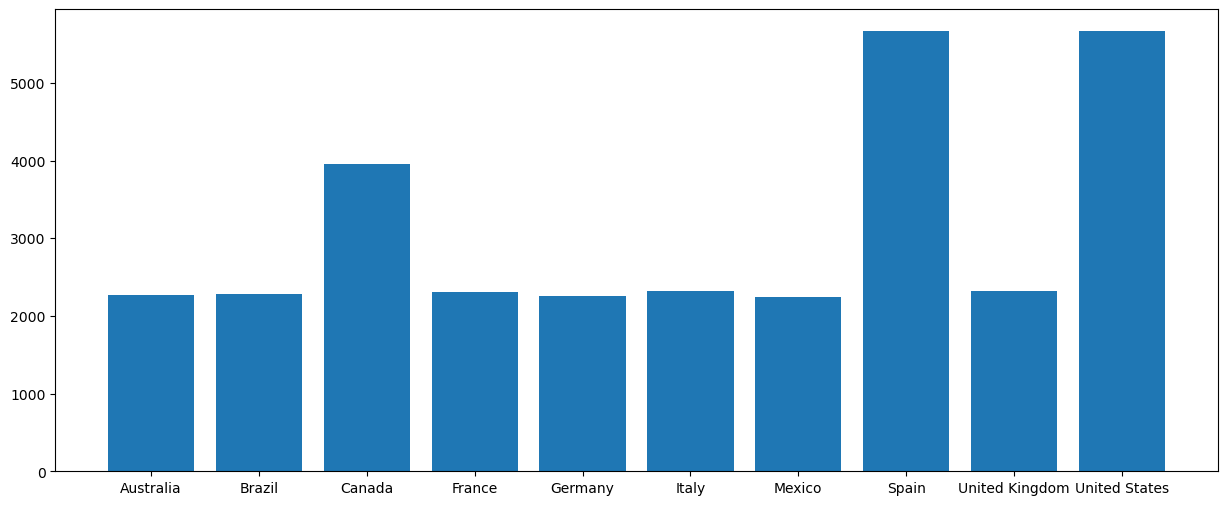

In [37]:
country_revenue = Data.groupby(['Country'])['Monthly Revenue'].sum()
print(country_revenue.sort_values(ascending=False))
plt.figure(figsize = (15,6))
plt.bar(country_revenue.index,country_revenue.values,align='center')

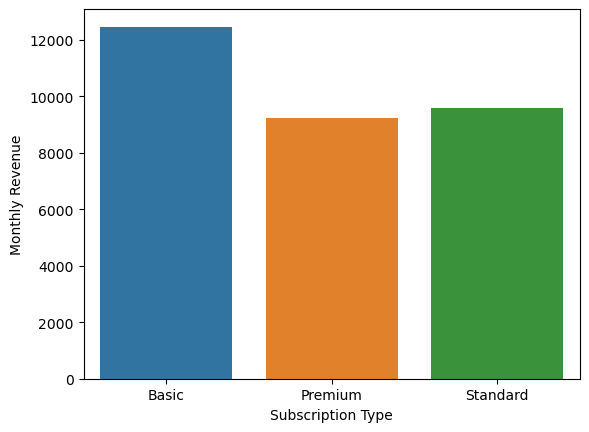

In [39]:
# Subscription Type generate more revenue
subscription_type_rev = Data.groupby('Subscription Type').sum().reset_index()
sns.barplot(x = 'Subscription Type', y ='Monthly Revenue', data = subscription_type_rev )
plt.show()

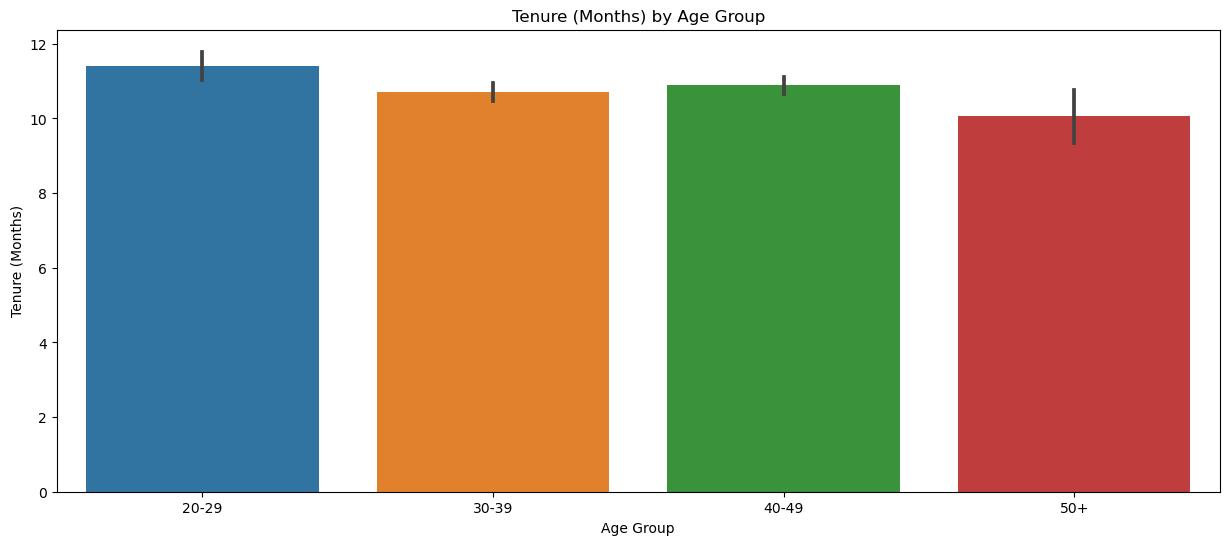

In [30]:
plt.figure(figsize=(15, 6))
sns.barplot(data=Data, x='age group', y='Tenure (Months)')
plt.title('Tenure (Months) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Tenure (Months)')
plt.show()